# Unsupervised Clustering on Well Log Data
Understanding the subsurface lithology is an important task in geoscience and petrophysics. Using a variety of electrical measurements generated from well logging technology we are able to make inferences about the underlying geology, such as the lithology, facies, porosity, and permeability.

Machine Learning algorithms have routinely been adopted to group well log measurements into distinct lithological groupings, known as facies. This process can be achieved using either unsupervised learning or supervised learning algorithms.

Supervised learning is the most common and practical of machine learning tasks and it is designed to learn from example using input data that has been mapped to the "correct" output. Alternatively, we can run the modelling using Unsupervised Learning, where we let the algorithms identify underlying patterns within the data that may not be easily visible during data exploration.

In this tutorial we will be carrying out unsupervised learning classification using three clustering methods (K Means Clustering, Gaussian Mixture Modelling and DBSCAN) and comparing the results with an established Lithofacies curve.

## What is Clustering / Cluster Analysis?
Clustering of data is a common form of exploratory data analysis (EDA) which is used to divide up the data into different groups based on shared characteristics or properties. Data points that are similar to each other are grouped together in the same cluster, and those that are different are placed in another cluster.

## K-Means Clustering
K-Means clustering is a very commonly used unsupervised machine learning algorithm. It is used to group data into K number of clusters by minimising the distance between the data point and the centroid.

The centroid is initialised at k random points in the data space and all points around it are assigned to the relevant cluster based on the distance to the centroid. The centroid is then adjusted to the central point of the cluster and the points surrounding it are reassigned. This continues until either there is no change in the centroids or the points remain in the same cluster or until a maximum number of iterations is reached.

K-Means is a hard clustering method where a data point either belongs to a cluster or it does not. It also carries out clustering by applying a circle (or hyper-sphere in multi-dimensional datasets)to the data.

## Gaussian Mixture Modelling
The GMM method also allows data points to be clustered, except that it accounts for data variance, results in a softer classification and rather than being distance based it is distribution based.

Also, the data point being classified has a probability of being one cluster or another.

While K-Means clustering works great if the data clusters are circular, however, in petrophysical and geological situations data rarely forms nice circular patterns. GMM modelling uses eliptical shaped cluster/decision boundaries and are therefore more flexible.

An excellent article looking at the differences between the two methods can be found at https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/

## Importing Libraries & Data Loading
The first step of the project is to import the libraries that we require. For this example we will be using NumPy for working with arrays, pandas for storing data, seaborn and matplotlib for displaying the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as colors

In [2]:
wells = pd.read_csv("Desktop/REX LOGS/Petrophysics_Preprocessing.csv")

In [3]:
wells

,GR,LLD,RHOB,NPHI,DEPTH,WELL
0,77.3045,1.4997,2.2656,0.0723,7799.0,AKASO-001
1,89.7565,1.4191,2.2873,0.4000,8656.5,AKASO-001
2,95.4250,1.3932,2.2981,0.4000,8657.0,AKASO-001
3,98.9561,1.4191,2.3141,0.4000,8657.5,AKASO-001
4,99.6995,1.3552,2.3143,0.4000,8658.0,AKASO-001
...,...,...,...,...,...,...
69974,129.5191,1.7509,2.3306,0.3163,11364.5,AKASO-012-ST1
69975,133.0938,1.6740,2.3369,0.3034,11365.0,AKASO-012-ST1
69976,128.3808,1.6653,2.3327,0.3037,11365.5,AKASO-012-ST1
69977,146.7920,1.8356,2.3367,0.2989,11366.0,AKASO-012-ST1


In [4]:
wells.describe()

,GR,LLD,RHOB,NPHI,DEPTH
count,69979.000000,69979.000000,69979.000000,69979.000000,69979.000000
mean,68.090474,4.214338,2.224551,0.308411,8880.815359
std,26.485363,4.797772,0.110522,0.078729,1992.052869
min,-14.785700,0.065100,1.847700,0.017900,3449.500000
25%,41.632400,1.418250,2.145700,0.250400,7401.000000
50%,69.897700,1.995600,2.210700,0.293800,8813.500000
75%,92.294100,4.718450,2.304300,0.374000,10130.000000
max,165.420700,23.206300,2.621800,0.600600,14920.000000


In [5]:
wells.columns

Index(['GR', 'LLD', 'RHOB', 'NPHI', 'DEPTH', 'WELL'], dtype='object')

In [6]:
wells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69979 entries, 0 to 69978
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GR      69979 non-null  float64
 1   LLD     69979 non-null  float64
 2   RHOB    69979 non-null  float64
 3   NPHI    69979 non-null  float64
 4   DEPTH   69979 non-null  float64
 5   WELL    69979 non-null  object 
dtypes: float64(5), object(1)
memory usage: 3.2+ MB


In [7]:
wells['WELL'].unique()

array(['AKASO-001', 'AKASO-013', 'AKASO-002', 'AKASO-004', 'AKASO-007',
       'AKASO-008', 'AKASO-009', 'AKASO-010', 'AKASO-012-ST1'],
      dtype=object)

In [8]:
wells['WELL'].value_counts()

WELL
AKASO-002        12604
AKASO-004        11620
AKASO-012-ST1    10381
AKASO-008        10378
AKASO-009         9034
AKASO-013         8186
AKASO-010         4939
AKASO-007         2809
AKASO-001           28
Name: count, dtype: int64

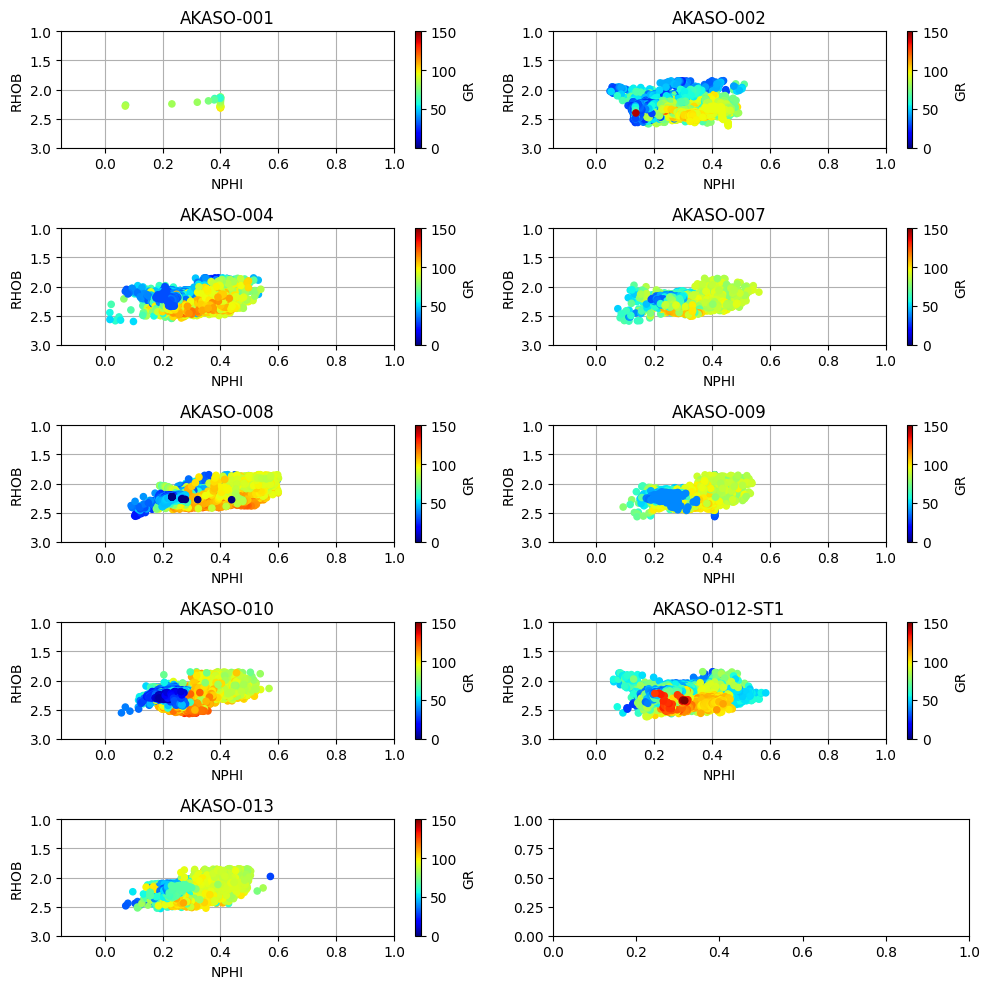

In [9]:
grouped = wells.groupby('WELL')
#Crossplot / Scatterplots Per Well¶
fig, axs = plt.subplots(5, 2, figsize=(10,10))

for (name, df), ax in zip(grouped, axs.flat):
    df.plot(kind='scatter', x='NPHI', y='RHOB', ax=ax, c='GR', cmap='jet', vmin=0, vmax=150)
    ax.set_xlim(-0.15,1)
    ax.set_ylim(3,1)
    ax.set_title(name)
    ax.grid(True)
    ax.set_axisbelow(True)
plt.tight_layout()

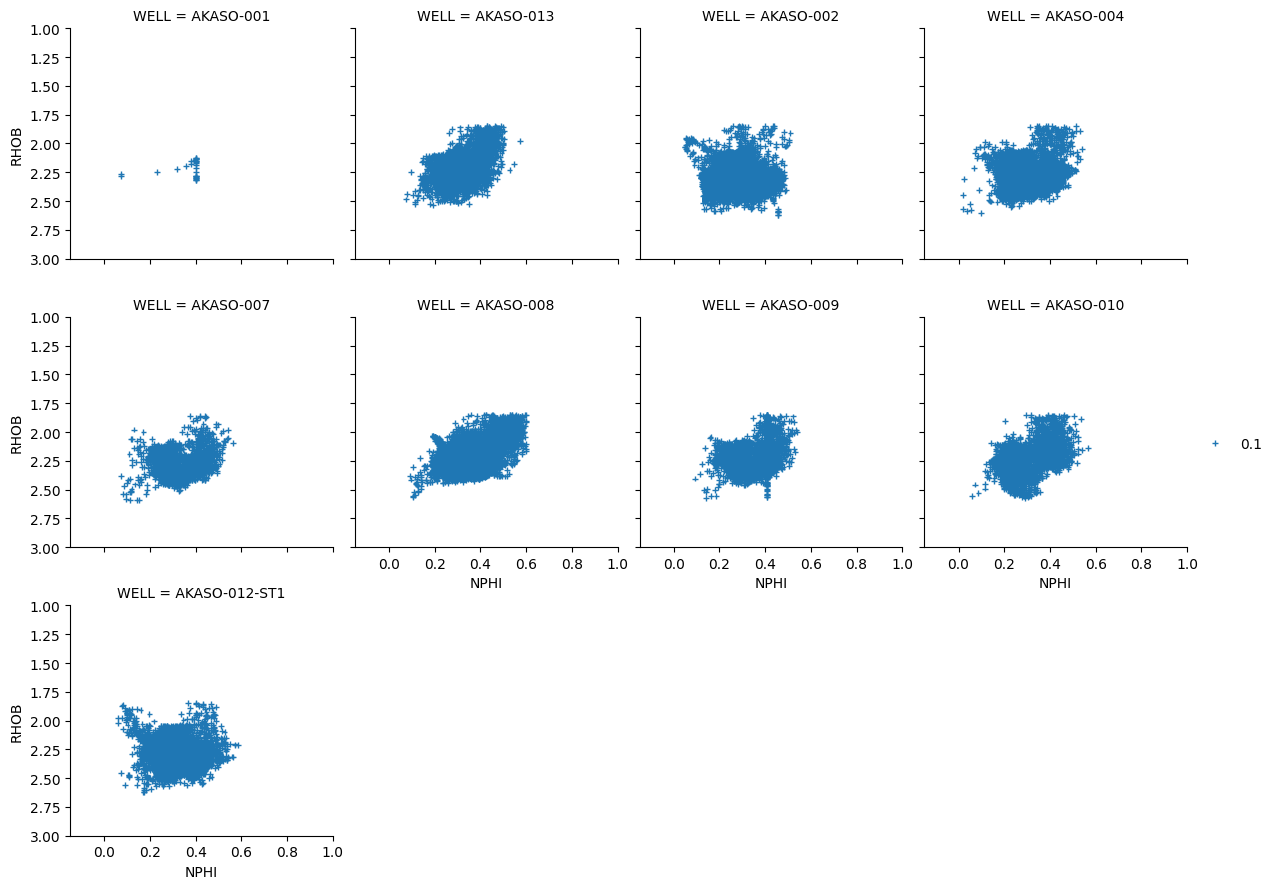

In [10]:
g = sns.FacetGrid(wells, col='WELL', col_wrap=4)
g.map(sns.scatterplot, 'NPHI', 'RHOB', linewidth=1, size=0.1, marker='+')
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))
g.add_legend()

Before we plot any data we need to create a few functions. The first is a create plot function, which will take a number of arguments and our facies curve, and will generate a conventional log plot.

In [11]:
def create_plot(wellname, dataframe, curves_to_plot, depth_curve, log_curves=[], facies_curves=[]):
    # Count the number of tracks we need
    num_tracks = len(curves_to_plot)
    
    facies_color = ['#F4D03F', '#F5B041','#DC7633','#6E2C00', '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D', 'red','black', 'blue']
    
            
    # Setup the figure and axes
    fig, ax = plt.subplots(nrows=1, ncols=num_tracks, figsize=(num_tracks*2, 10))
    
    # Create a super title for the entire plot
    fig.suptitle(wellname, fontsize=20, y=1.05)
    
    # Loop through each curve in curves_to_plot and create a track with that data
    for i, curve in enumerate(curves_to_plot):
        if curve in facies_curves:
            cmap_facies = colors.ListedColormap(facies_color[0:dataframe[curve].max()], 'indexed')
            
            cluster=np.repeat(np.expand_dims(dataframe[curve].values,1), 100, 1)
            im=ax[i].imshow(cluster, interpolation='none', cmap=cmap_facies, aspect='auto',vmin=dataframe[curve].min(),vmax=dataframe[curve].max(), 
                            extent=[0,20, depth_curve.max(), depth_curve.min()])
            
#             for key in lithology_setup.keys():
#                 color = lithology_setup[key]['color']
#                 ax[i].fill_betweenx(depth_curve, 0, dataframe[curve].max(), 
#                                   where=(dataframe[curve]==key),
#                                   facecolor=color)
#                 
        else:
            ax[i].plot(dataframe[curve], depth_curve)

        
        # Setup a few plot cosmetics
        ax[i].set_title(curve, fontsize=14, fontweight='bold')
        ax[i].grid(which='major', color='lightgrey', linestyle='-')
        
        # We want to pass in the deepest depth first, so we are displaying the data 
        # from shallow to deep
        ax[i].set_ylim(depth_curve.max(), depth_curve.min())
#         ax[i].set_ylim(3500, 3000)

        # Only set the y-label for the first track. Hide it for the rest
        if i == 0:
            ax[i].set_ylabel('DEPTH (ft)', fontsize=18, fontweight='bold')
        else:
            plt.setp(ax[i].get_yticklabels(), visible = False)
        
        # Check to see if we have any logarithmic scaled curves
        if curve in log_curves:
            ax[i].set_xscale('log')
            ax[i].grid(which='minor', color='lightgrey', linestyle='-')
        

    
    plt.tight_layout()
    plt.show()
    
    return cmap_facies

## Splitting Data by Well Function
The second method we will create will be used to split up our dataframe by wells. This is done using the groupby function, and will allow us to store each dataframe within a list for easy access later

In [12]:
def well_splitter(dataframe, groupby_column):
    grouped = dataframe.groupby(groupby_column)
    
    # Create empty lists
    wells_as_dfs = []
    wells_wellnames = []

    #Split up the data by well
    for well, data in grouped:
        wells_as_dfs.append(data)
        wells_wellnames.append(well)

    print('index  wellname')
    for i, name in enumerate(wells_wellnames):
        print(f'{i}      {name}')
    
    return wells_as_dfs, wells_wellnames

In [13]:
grouped_wells, grouped_names = well_splitter(wells, 'WELL')

index  wellname
0      AKASO-001
1      AKASO-002
2      AKASO-004
3      AKASO-007
4      AKASO-008
5      AKASO-009
6      AKASO-010
7      AKASO-012-ST1
8      AKASO-013


We now have a list of wells and their index position with the list object.

## Clustering - Unsupervised
In this section, we are going to setup our clustering models and run them on our dataset.

First we will import our clustering models from the sklearn library.

In [14]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

## Finding the Optimum Number of Clusters
To make sure that K-Means and Gaussian Mixture Modelling models are working efficiently we need to provide them with a starting number of clusters. If the number of clusters is incorrectly selected, the algorithms may not perform well or could take longer to resolve (especially if the number is too high).

We can attempt to identify the optimum number of clusters using an elbow plot, where the goal is to select a number for the clusters based on the 'elbow' or inflection formed in the results. There are other methods such as the silhouette method for picking the number of clusters.

For this example, we will use the elbow plot. To do this we evaluate the model performance over a given range of clusters, and then from the plot identify the most suitable number.

In [15]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k, n_init=10)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()
    

Silhouette analysis studies the distance between neighboring clusters, while also giving information about the distance between points inside the same cluster. The plot displays a measure of how close a point in one group is to a nearby group. The measure has a range from -1 to 1. Where a value close to 1 show that a point is far from the neighboring clusters, and a value of 0 indicates that such a point is remarkably close to the decision boundary between the two neighboring clusters. A negative number implies that such points have been assigned to the wrong cluster.

C:\Users\USER\anaconda3\envs\Daviano_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


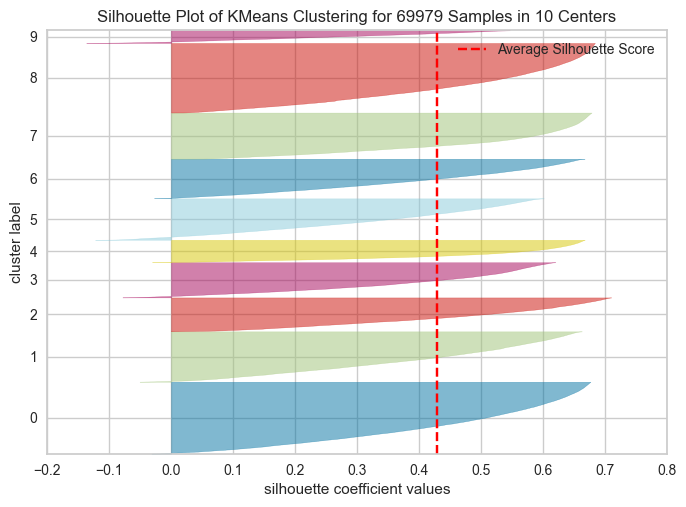

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 69979 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [16]:
from yellowbrick.cluster import SilhouetteVisualizer

def visualise_k_means_sillouette(data, max_k):
    fig, ax = plt.subplots(2, 3, figsize=(10, 5))
    means = []
    silhouette_avg = []
    
    for k in range(2,max_k): #start at 2 clusters
        print(k)
        kmeans = KMeans(n_clusters=k, n_init=10)
        q, mod = divmod(k, 2)
        
        vis = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
        vis.fit(data)
    
    # plt.plot(means, inertias, 'o-')
    # plt.xlabel("Number of Clusters")
    # plt.ylabel("Inertia")
    # plt.grid(True)
    # plt.show()

data = wells[['GR', 'LLD', 'RHOB', 'NPHI']]
kmeans = KMeans(n_clusters=10)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(data)
visualizer.show()

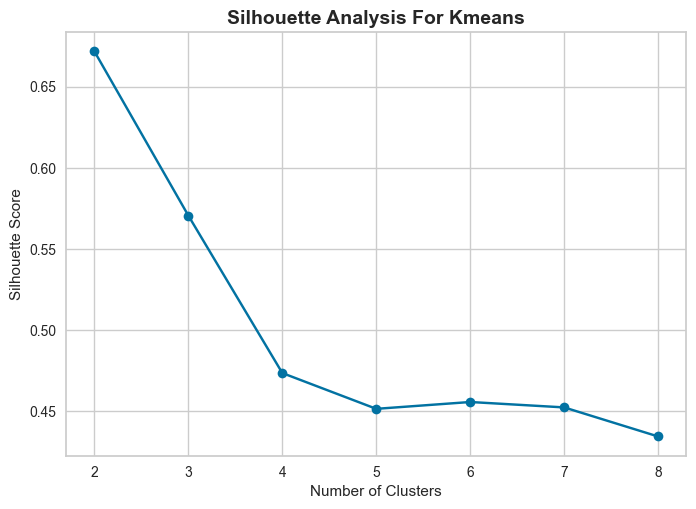

In [17]:
from sklearn.metrics import silhouette_score

def optimise_k_means_sillouette(data, max_k):
    means = []
    silhouette_avg = []
    
    range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
    silhouette_avg = []
    for num_clusters in range_n_clusters:

        # initialise kmeans
        kmeans = KMeans(n_clusters=num_clusters, n_init=10)
        kmeans.fit(data)
        cluster_labels = kmeans.labels_

        # silhouette score
        silhouette_avg.append(silhouette_score(data, cluster_labels))
    plt.plot(range_n_clusters,silhouette_avg, 'bo-')
    plt.xlabel("Number of Clusters") 
    plt.ylabel('Silhouette Score') 
    plt.title('Silhouette Analysis For Kmeans', fontsize=14, fontweight='bold')
    plt.show()

optimise_k_means_sillouette(wells[['GR', 'LLD', 'RHOB', 'NPHI']], 5)

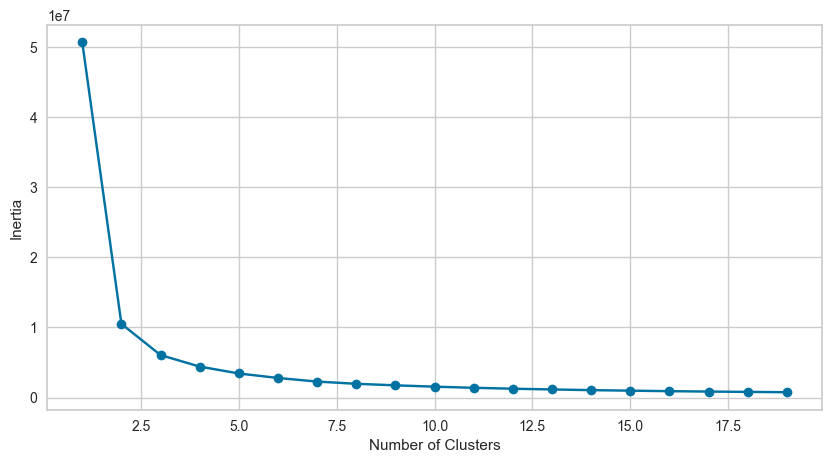

In [18]:
#Elbow plot
optimise_k_means(wells[['GR', 'LLD', 'RHOB', 'NPHI']], 20)

In the plot above, we can see that the inertia (sum of the squared distances to the nearest cluster center) decreases as we increase the number of clusters. There is no clear defined break within this dataset, however, we can see that the slope changes from about 5 clusters onwards. The picking of this value will be dependent on the interpreter and could range from 4 to 10.

So for this example we will take 5 as the optimum number of clusters.

## Fitting the Clustering Models

In [19]:
# Create the KMeans model with the selected number of clusters
kmeans = KMeans(n_clusters=5, n_init=10)

# Fit the model to our dataset
kmeans.fit(wells[['GR', 'LLD', 'RHOB', 'NPHI']])

# Assign the data back to the workingdf
wells['KMeans'] = kmeans.labels_

To make the comparison simple, we will use the same number of clusters in the Gaussian Mixture Model. For this model the number of clusters parameter is known as n_components

In [20]:
# Create the gmm model with the selected number of clusters/components
gmm = GaussianMixture(n_components=5)

# Fit the model to our dataset
gmm.fit(wells[['GR', 'LLD', 'RHOB', 'NPHI']])

# Predict the labels
gmm_labels = gmm.predict(wells[['GR', 'LLD', 'RHOB', 'NPHI']])

# Assign the labels back to the workingdf
wells['GMM'] = gmm_labels

## Plotting the Results
Now that the clusters have been computed using KMeans and GMM methods, we can plot the data to see how well the predicted in relation to the labelled lithologies. Note that these methods are unsupervised and do not use the labelled data for training. We are comparing here how well unsupervised methods perform with well log data.

As we predicted into the main workingdf dataframe, we need to split the data up again into individual wells. We can do this by calling upon the simple function created earlier.

In [21]:
dfs_wells, wellnames = well_splitter(wells, 'WELL')

index  wellname
0      AKASO-001
1      AKASO-002
2      AKASO-004
3      AKASO-007
4      AKASO-008
5      AKASO-009
6      AKASO-010
7      AKASO-012-ST1
8      AKASO-013


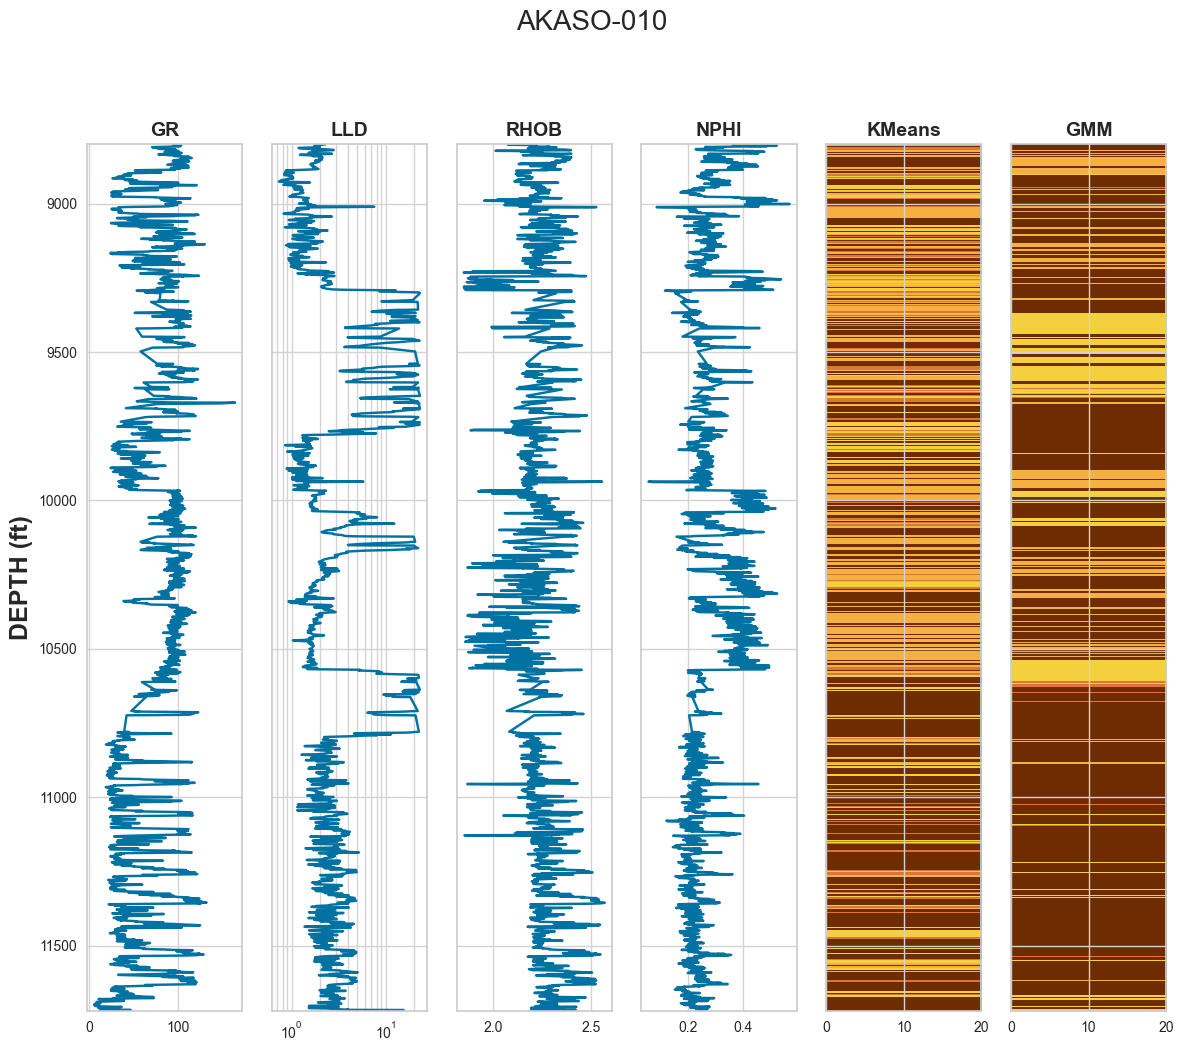

In [22]:
# Setup the curves to plot
curves_to_plot = ['GR', 'LLD', 'RHOB', 'NPHI', 'KMeans','GMM']
logarithmic_curves = ['LLD']
facies_curve=['KMeans','GMM']

# Create plot by passing in the relevant well index number
well = 6
cmap_facies = create_plot(wellnames[well], 
            dfs_wells[well], 
            curves_to_plot, 
            dfs_wells[well]['DEPTH'], 
            logarithmic_curves, facies_curve)

## Viewing Results on Scatterplots / Crossplots
Another way to view the performance of the clustering is through scatter plots. We can do this using the common density-neutron scatterplots / crossplots and using matplotlib.

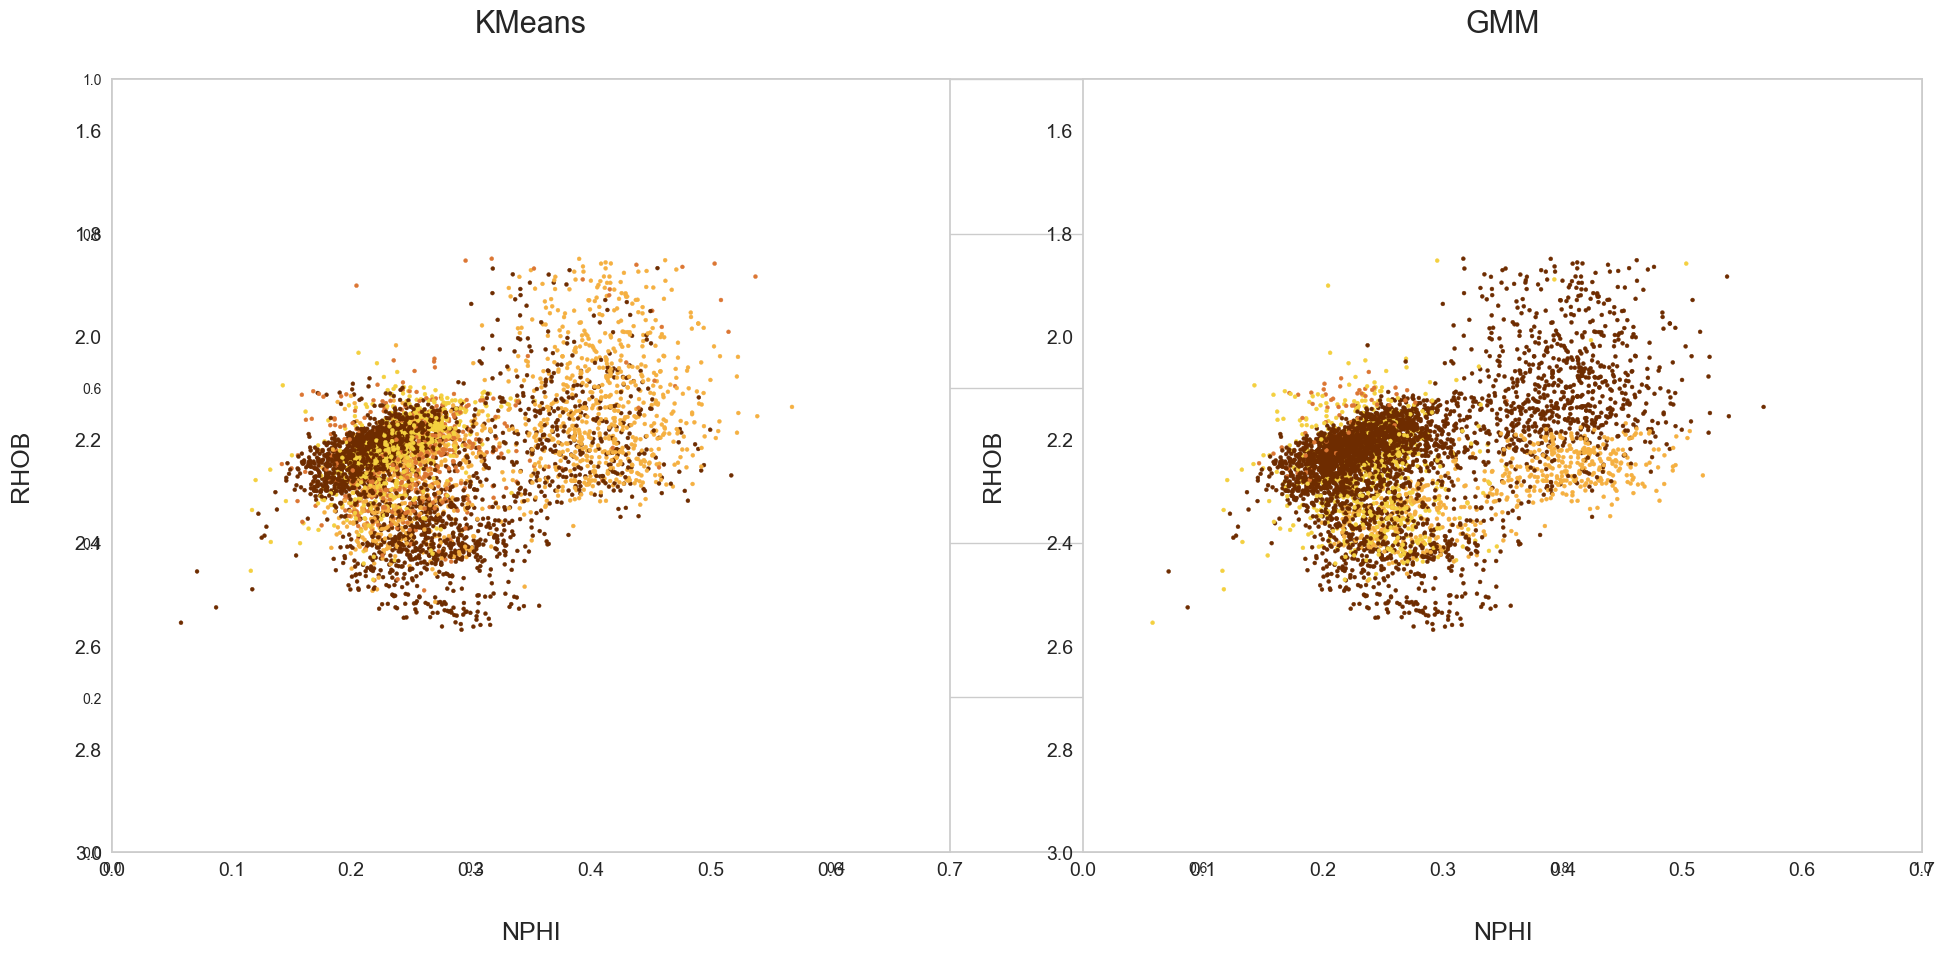

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
ax1 = plt.subplot2grid((1,2), (0,0))
ax1.scatter(dfs_wells[well]['NPHI'], dfs_wells[well]['RHOB'], c=dfs_wells[well]['KMeans'], s=8, cmap=cmap_facies)
ax1.set_title('KMeans', fontsize=22, y=1.05)

ax2 = plt.subplot2grid((1,2), (0,1))
ax2.scatter(dfs_wells[well]['NPHI'], dfs_wells[well]['RHOB'], c=dfs_wells[well]['GMM'], s=8, cmap=cmap_facies)
ax2.set_title('GMM', fontsize=22, y=1.05)

for ax in [ax1, ax2]:
    ax.set_xlim(0, 0.7)
    ax.set_ylim(3, 1.5)
    ax.set_ylabel('RHOB', fontsize=18, labelpad=30)
    ax.set_xlabel('NPHI', fontsize=18, labelpad=30)
    ax.grid()
    ax.set_axisbelow(True)

    ax.tick_params(axis='both', labelsize=14)
plt.tight_layout()

Text(0.5, 0.92, '3D Scatter Plot with KMeans Clustering')

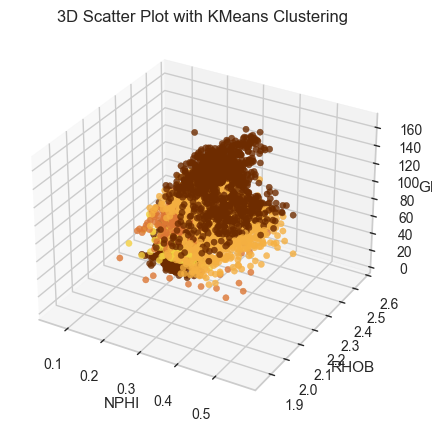

In [42]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(dfs_wells[6]['NPHI'], dfs_wells[6]['RHOB'], dfs_wells[6]['GR'], c=dfs_wells[6]['KMeans'], alpha=0.8, cmap=cmap_facies)
ax.set_xlabel('NPHI')
ax.set_ylabel('RHOB')
ax.set_zlabel('GR')
ax.set_title('3D Scatter Plot with KMeans Clustering')

In [24]:
wells

,GR,LLD,RHOB,NPHI,DEPTH,WELL,KMeans,GMM
0,77.3045,1.4997,2.2656,0.0723,7799.0,AKASO-001,2,0
1,89.7565,1.4191,2.2873,0.4000,8656.5,AKASO-001,1,1
2,95.4250,1.3932,2.2981,0.4000,8657.0,AKASO-001,1,1
3,98.9561,1.4191,2.3141,0.4000,8657.5,AKASO-001,3,1
4,99.6995,1.3552,2.3143,0.4000,8658.0,AKASO-001,3,1
...,...,...,...,...,...,...,...,...
69974,129.5191,1.7509,2.3306,0.3163,11364.5,AKASO-012-ST1,3,1
69975,133.0938,1.6740,2.3369,0.3034,11365.0,AKASO-012-ST1,3,1
69976,128.3808,1.6653,2.3327,0.3037,11365.5,AKASO-012-ST1,3,1
69977,146.7920,1.8356,2.3367,0.2989,11366.0,AKASO-012-ST1,3,0


Even though there is mixing of the clusters in each method, the interval that was discussed in the log plot section can be identified in the lower left of the plot, where we have higher density values and lower neutron porosity values.

In the KMeans grouping, this cluster shows as one complete cluster, however, in the GMM method we can see it matches closer to the supplied lithology.

## Viewing Results on a Pairplot
As we used four input curves for our model, we should look at all of these to see how the clusters vary. The best way to do this is to use the excellent pairplot from the seaborn library. This plot displays the relationships between the data in the dataset on a grid. This allows a quick and easy way to identify and visualise the data. Along the diagonal the distribution of the data split by cluster is also plotted.

As we are looking at well number 4 we need to pass in that dataframe to the pairplot (dfs_wells[4])

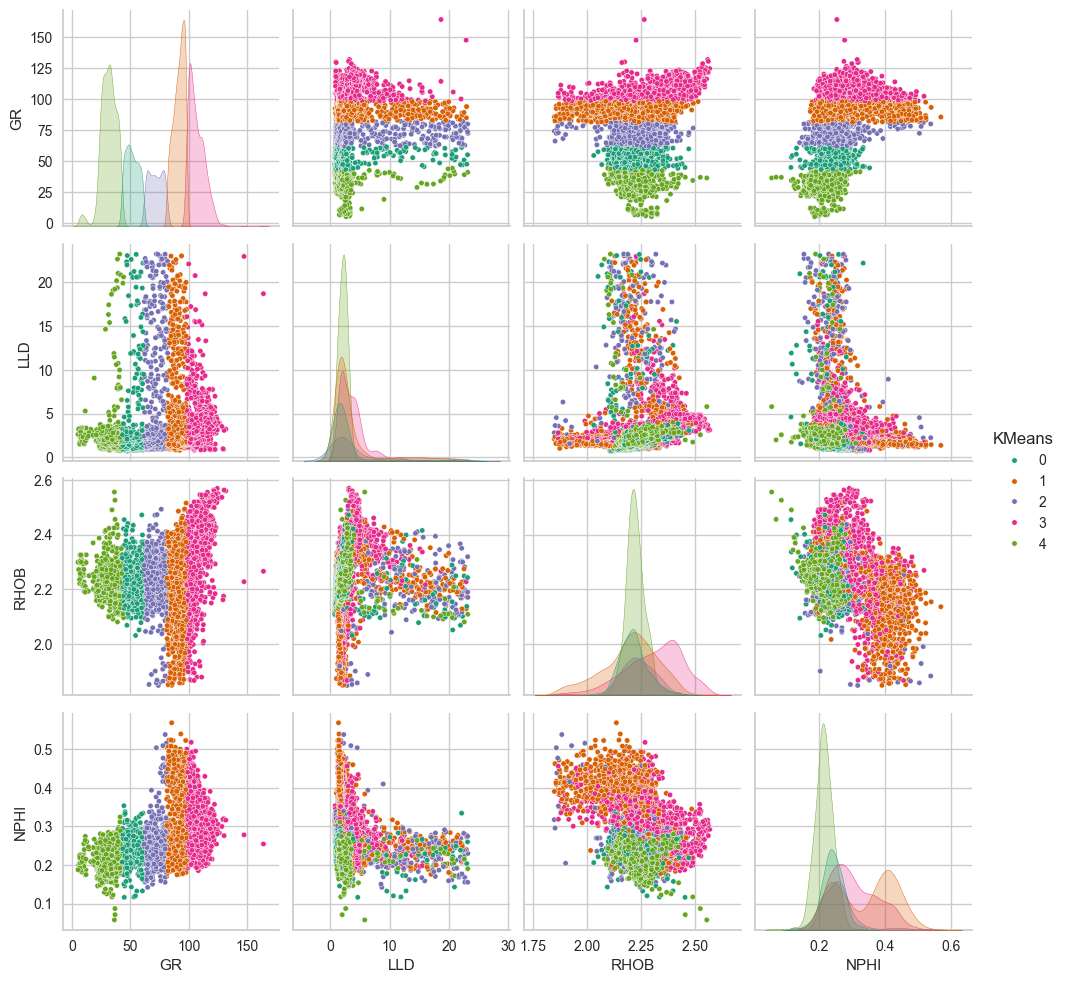

In [25]:
sns.pairplot(dfs_wells[6], vars=['GR', 'LLD', 'RHOB','NPHI'], hue='KMeans', palette='Dark2',
             diag_kind='kde', plot_kws = {'s': 15, 'marker':'o', 'alpha':1})

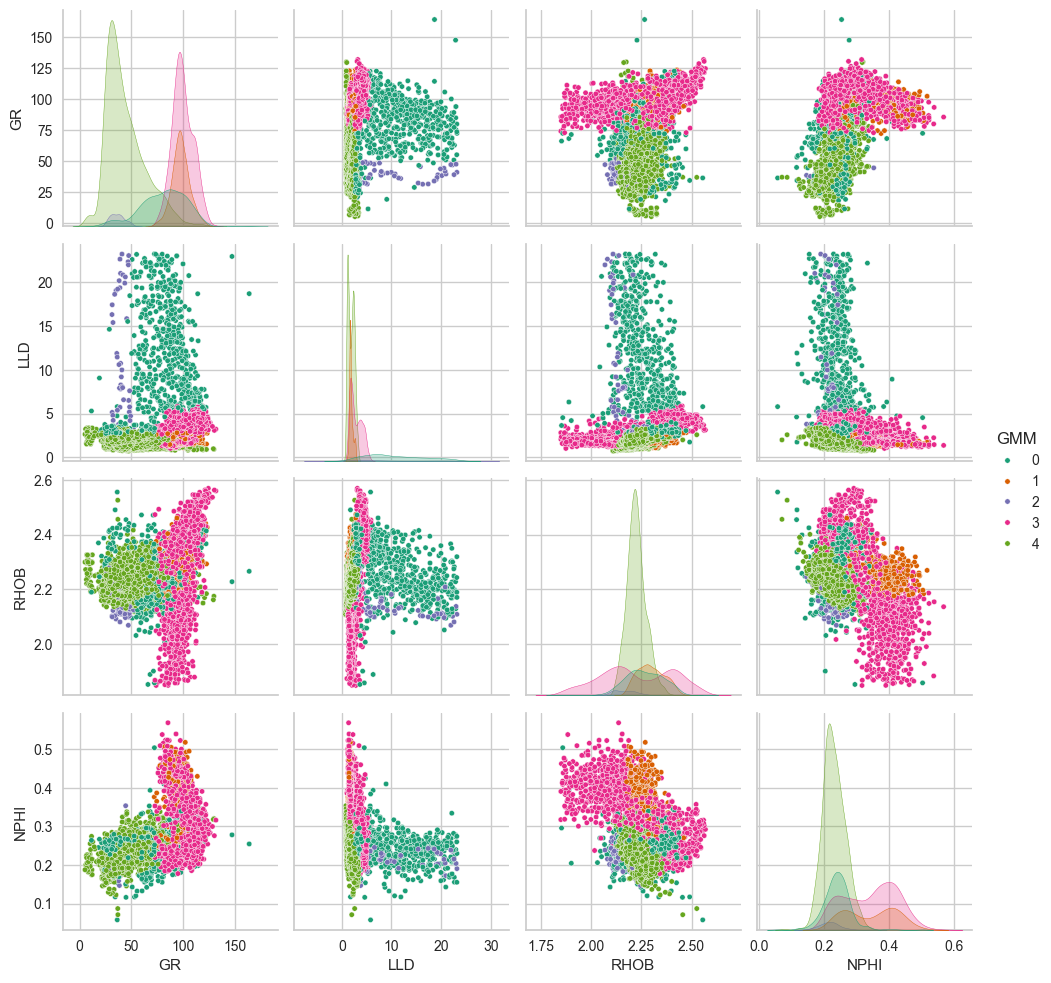

In [26]:
sns.pairplot(dfs_wells[6], vars=['GR', 'LLD', 'RHOB','NPHI'], hue='GMM', palette='Dark2',
             diag_kind='kde', plot_kws = {'s': 15, 'marker':'o', 'alpha':1})

This provides us a much nicer plot to look at and also allows us to see how the data is clustered in the other logging curves. We can see that the GMM model provides some improvement in defining the clusters.

As K-Means clustering utilises spherical clusters, it may not always be appropriate to well log data and the subsurface. However, Gaussian Mixture Modelling does appear to provide a slight improvement in clustering.